In [1]:
import pandas as pd
import pycaret

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
print(f"Missing values :{df.isnull().sum()}")

print(f"Duplicates values :{df.duplicated().sum()}")


Missing values :Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64
Duplicates values :0


In [6]:
# Print unique values for object columns
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"{col}: {df[col].unique()}")


Attrition: ['Yes' 'No']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']


In [7]:
# Mapping the values to numerical values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df['EducationField'] = df['EducationField'].map({'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

# Applying the new Data Types
df['Attrition'] = df['Attrition'].astype(int)
df['Department'] = df['Department'].astype(int)
df['EducationField'] = df['EducationField'].astype(int)
df['MaritalStatus'] = df['MaritalStatus'].astype(int)

In [8]:
# Show first 5 rows after changing the data types
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,0,1,2,0,2,4,0,5993,8,1,6
1,49,0,1,8,1,0,3,2,1,5130,1,3,10
2,37,1,1,2,2,1,4,3,0,2090,6,3,0
3,33,0,1,3,4,0,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [22]:
# Display range (min/max) for each numerical column except Attrition
print("Range of values for each feature (except Attrition):")
print("=" * 50)

# Get all columns except Attrition
features = [col for col in df.columns if col != 'Attrition']

for col in features:
    if df[col].dtype in ['int64', 'float64']:
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"{col}:")
        print(f"  Min: {min_val}")
        print(f"  Max: {max_val}")
        print(f"  Range: {min_val} - {max_val}")
        print()


Range of values for each feature (except Attrition):
Age:
  Min: 18
  Max: 60
  Range: 18 - 60

DistanceFromHome:
  Min: 1
  Max: 29
  Range: 1 - 29

Education:
  Min: 1
  Max: 5
  Range: 1 - 5

EnvironmentSatisfaction:
  Min: 1
  Max: 4
  Range: 1 - 4

JobSatisfaction:
  Min: 1
  Max: 4
  Range: 1 - 4

MonthlyIncome:
  Min: 1009
  Max: 19999
  Range: 1009 - 19999

NumCompaniesWorked:
  Min: 0
  Max: 9
  Range: 0 - 9

WorkLifeBalance:
  Min: 1
  Max: 4
  Range: 1 - 4

YearsAtCompany:
  Min: 0
  Max: 40
  Range: 0 - 40



Correlation with Attrition:
Attrition                  1.000000
MaritalStatus             -0.162070
MonthlyIncome             -0.159840
Age                       -0.159205
YearsAtCompany            -0.134392
JobSatisfaction           -0.103481
EnvironmentSatisfaction   -0.103369
DistanceFromHome           0.077924
EducationField             0.075437
Department                -0.063991
WorkLifeBalance           -0.063939
NumCompaniesWorked         0.043494
Education                 -0.031373
Name: Attrition, dtype: float64


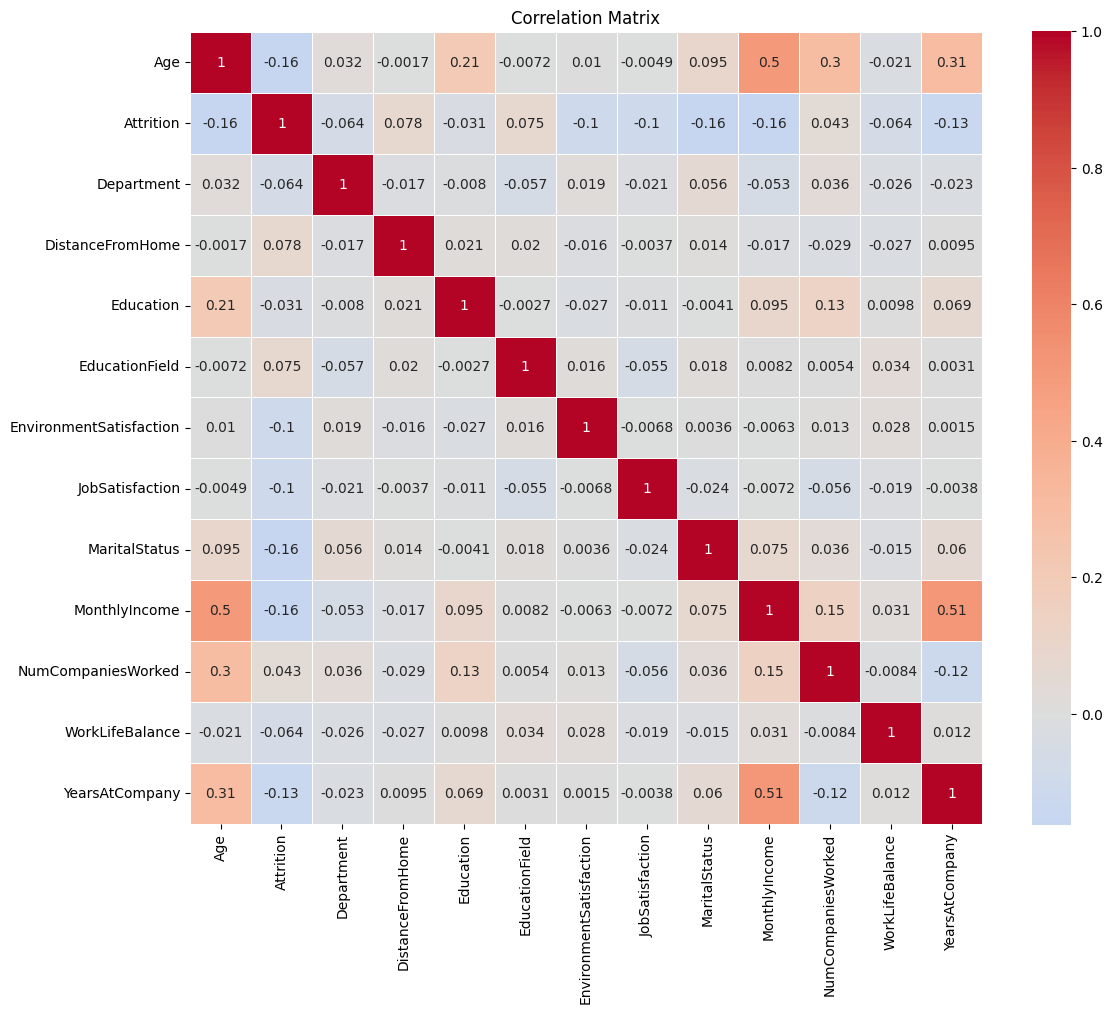


Top 5 features most correlated with Attrition:
MaritalStatus: -0.1621
MonthlyIncome: -0.1598
Age: -0.1592
YearsAtCompany: -0.1344
JobSatisfaction: -0.1035


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with Attrition specifically
print("Correlation with Attrition:")
attrition_corr = correlation_matrix['Attrition'].sort_values(key=abs, ascending=False)
print(attrition_corr)

# Create heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify features most correlated with Attrition (excluding Attrition itself)
most_correlated = attrition_corr.drop('Attrition').head(5)
print(f"\nTop 5 features most correlated with Attrition:")
for feature, corr_value in most_correlated.items():
    print(f"{feature}: {corr_value:.4f}")


Attrition Distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition Percentage Distribution:
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


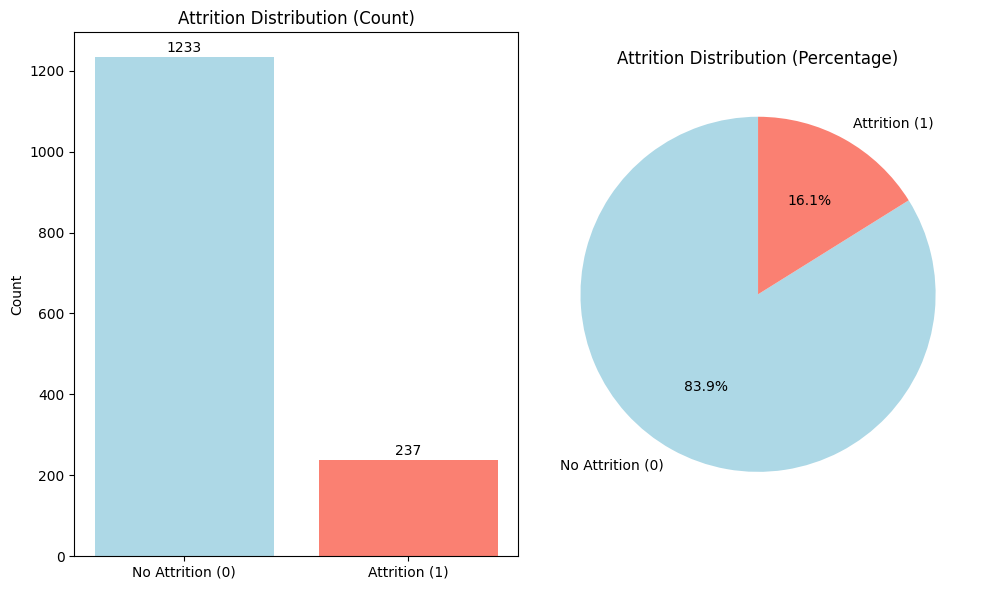

In [10]:
# Print distribution of Attrition
print("Attrition Distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition Percentage Distribution:")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Visualize the distribution
plt.figure(figsize=(10, 6))

# Bar plot
plt.subplot(1, 2, 1)
attrition_counts = df['Attrition'].value_counts()
plt.bar(['No Attrition (0)', 'Attrition (1)'], attrition_counts.values, 
        color=['lightblue', 'salmon'])
plt.title('Attrition Distribution (Count)')
plt.ylabel('Count')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

# Pie chart
plt.subplot(1, 2, 2)
labels = ['No Attrition (0)', 'Attrition (1)']
plt.pie(attrition_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=['lightblue', 'salmon'], startangle=90)
plt.title('Attrition Distribution (Percentage)')

plt.tight_layout()
plt.show()


Original data distribution:
Class 0 (No Attrition): 1233
Class 1 (Attrition): 237
Total samples: 1470

After SMOTE data distribution:
Class 0 (No Attrition): 1233
Class 1 (Attrition): 1233
Total samples: 2466


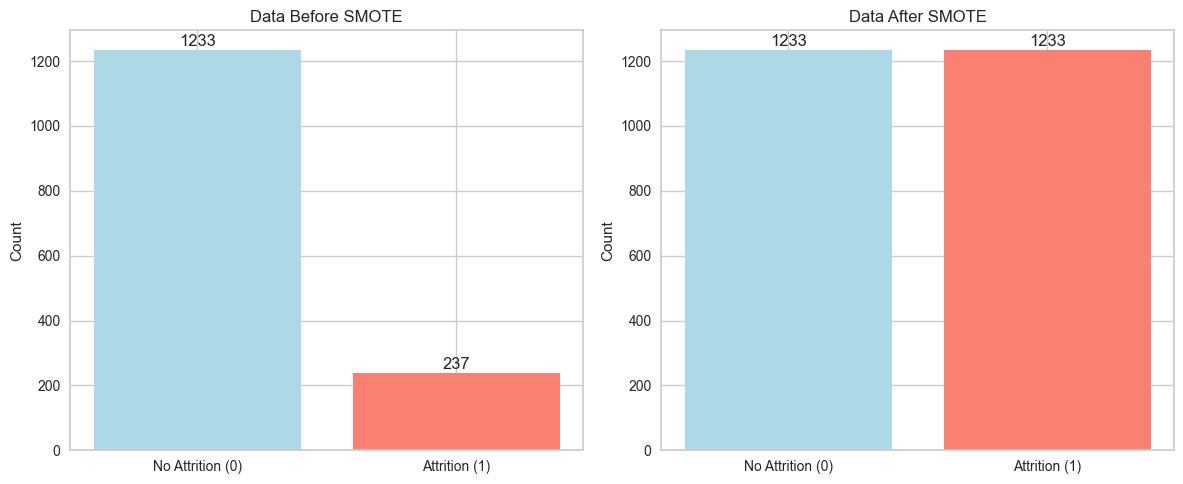

In [14]:
# Apply SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Original data distribution:")
print(f"Class 0 (No Attrition): {sum(y == 0)}")
print(f"Class 1 (Attrition): {sum(y == 1)}")
print(f"Total samples: {len(y)}")

print("\nAfter SMOTE data distribution:")
print(f"Class 0 (No Attrition): {sum(y_smote == 0)}")
print(f"Class 1 (Attrition): {sum(y_smote == 1)}")
print(f"Total samples: {len(y_smote)}")

# Visualize the effect of SMOTE
plt.figure(figsize=(12, 5))

# Before SMOTE
plt.subplot(1, 2, 1)
y_counts = y.value_counts()
plt.bar(['No Attrition (0)', 'Attrition (1)'], y_counts.values, 
        color=['lightblue', 'salmon'])
plt.title('Data Before SMOTE')
plt.ylabel('Count')
for i, v in enumerate(y_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

# After SMOTE
plt.subplot(1, 2, 2)
y_smote_counts = pd.Series(y_smote).value_counts()
plt.bar(['No Attrition (0)', 'Attrition (1)'], y_smote_counts.values, 
        color=['lightblue', 'salmon'])
plt.title('Data After SMOTE')
plt.ylabel('Count')
for i, v in enumerate(y_smote_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [17]:
# Prepare X and y for modeling with specific features
Xs = X_smote[['MaritalStatus', 'MonthlyIncome', 'Age', 'YearsAtCompany', 'JobSatisfaction']]
Ys = y_smote

print("Selected features for modeling:")
print("X features:", X.columns.tolist())
print("y target:", y.name)



Selected features for modeling:
X features: ['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']
y target: Attrition


In [ ]:


# Combine X_train and y_train for PyCaret
train_data = Xs.copy()
train_data['Attrition'] = Ys

print("\nTraining data shape:", train_data.shape)
print("Training data columns:", train_data.columns.tolist())

# Setup PyCaret environment
import pycaret.classification as pc

# Initialize PyCaret classification setup
clf = pc.setup(
    data=train_data,
    target='Attrition',
    session_id=42,
    train_size=0.8,  # Use all training data since we already split
    verbose=False
)

# Compare multiple models to find the best one
print("\nComparing models...")
models_comparison = pc.compare_models(
    include=['lr', 'rf', 'et', 'xgboost', 'lightgbm', 'dt', 'nb', 'knn'],
    sort='Accuracy',
    n_select=1,  # Select only the best model
    verbose=False
)

print("\nBest model selected based on accuracy")

# Create and evaluate the best model
print("\nCreating the best model...")
best_model = pc.create_model(models_comparison, verbose=False)

# Print accuracy of the best model
model_results = pc.pull()
accuracy = model_results['Accuracy'].iloc[0]
print(f"\nBest model accuracy: {accuracy:.4f}")

# Evaluate the best model
print("\nEvaluating the best model...")
pc.evaluate_model(best_model)

# Finalize the model (trains on full training dataset)
print("\nFinalizing the best model...")
final_model = pc.finalize_model(best_model)

# Save the model
print("\nSaving the model...")
pc.save_model(final_model, 'attrition_prediction_model')
print("Model saved as 'attrition_prediction_model.pkl'")



Training data shape: (2466, 6)
Training data columns: ['MaritalStatus', 'MonthlyIncome', 'Age', 'YearsAtCompany', 'JobSatisfaction', 'Attrition']

Comparing models...

Best model selected based on accuracy

Creating the best model...

Best model accuracy: 0.8586

Evaluating the best model...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


Finalizing the best model...

Saving the model...
Transformation Pipeline and Model Successfully Saved
Model saved as 'attrition_prediction_model.pkl'


In [21]:
# Make predictions with the final model
print("\nMaking predictions with sample inputs...")

# Define sample input data for prediction
sample_inputs = {
    'MaritalStatus': 1,  # 1 for Married (adjust based on your encoding)
    'MonthlyIncome': 5000,
    'Age': 35,
    'YearsAtCompany': 5,
    'JobSatisfaction': 3
}

# Create a DataFrame with the sample input
import pandas as pd
sample_df = pd.DataFrame([sample_inputs])

# Make prediction using the final model
prediction = pc.predict_model(final_model, data=sample_df)

# Display the prediction result
print(f"\nSample input: {sample_inputs}")
print(f"Prediction: {prediction['prediction_label'].iloc[0]}")
print(f"Prediction Score: {prediction['prediction_score'].iloc[0]:.4f}")

# You can also make predictions with multiple samples
print("\nMaking predictions with multiple samples...")
multiple_samples = pd.DataFrame([
    {'MaritalStatus': 0, 'MonthlyIncome': 3000, 'Age': 25, 'YearsAtCompany': 1, 'JobSatisfaction': 2},
    {'MaritalStatus': 1, 'MonthlyIncome': 8000, 'Age': 45, 'YearsAtCompany': 10, 'JobSatisfaction': 4},
    {'MaritalStatus': 2, 'MonthlyIncome': 4500, 'Age': 30, 'YearsAtCompany': 3, 'JobSatisfaction': 3}
])

multiple_predictions = pc.predict_model(final_model, data=multiple_samples)
print("\nMultiple predictions:")
for i, row in multiple_predictions.iterrows():
    print(f"Sample {i+1}: Attrition = {row['prediction_label']}, Score = {row['prediction_score']:.4f}")



Making predictions with sample inputs...



Sample input: {'MaritalStatus': 1, 'MonthlyIncome': 5000, 'Age': 35, 'YearsAtCompany': 5, 'JobSatisfaction': 3}
Prediction: 0
Prediction Score: 0.9960

Making predictions with multiple samples...



Multiple predictions:
Sample 1: Attrition = 1.0, Score = 0.9703
Sample 2: Attrition = 0.0, Score = 0.5423
Sample 3: Attrition = 0.0, Score = 0.9650
